In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Import the Ipl Dataset

data = pd.read_csv("IPLData.csv")

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [9]:
data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

# Cleaning The Data

We are Considering the Capped Batters, Bolowers, Wicket Kippers, All-rounders as Uncapped Players are playing for first time so no relevent data is available.

In [17]:
#segregating Data - Capped Batters
#we have kept the batting parameters to restrict the analysis for batter specific tendencies. 

batters = data.loc[(data["Player_Type"] == "Batter")]
batters_new = batters.loc[(batters["Capped"] == 1)]

Capped_Batters = batters_new[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate']]

In [25]:
batters.head(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#segregating Data Capped Bowlers
#we have only kept the bowling parameters, since we will purely judge the bowlers on their bowling statistics. 
bowlers = data.loc[(data["Player_Type"] == "Bowler ")]
bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]
Capped_Bowlers = bowlers_new[['Player Name','Team','Nationality','Matches_Played','Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]

In [30]:
bowlers.head(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,138.0,13.80,102.99,76.0,20.53,8.21,15.00,NaN,NaN,NaN
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,13.0,4.33,68.42,76.0,26.09,8.40,18.64,NaN,NaN,NaN
38,Mohammad Shami,Gujarat,Indian,Bowler,1,77.0,69.0,6.27,94.53,79.0,30.41,8.63,21.14,NaN,NaN,NaN
39,T Natarajan,Hyderabad,Indian,Bowler,1,24.0,3.0,3.00,60.00,20.0,34.40,8.24,25.05,NaN,NaN,NaN
40,Deepak Chahar,Chennai,Indian,Bowler,1,63.0,79.0,11.29,138.60,59.0,29.19,7.80,22.44,NaN,NaN,NaN


In [31]:

#segregating Data Capped Keepers
#We are only keeping the relavant parameters for the keepers, since bowling figures are not needed for the wicket-keepers. 

Keepers = data.loc[(data["Player_Type"] == "Keeper")]

Keepers_new = Keepers.loc[(Keepers["Capped"] == 1)]

Capped_Keepers = Keepers_new[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate','Catches','Run_outs','Stumps']]

In [32]:
Keepers.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,Keeper,1,77.0,2256.0,31.3,130.9,NaN,NaN,NaN,NaN,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,Keeper,1,175.0,3916.0,29.4,127.5,NaN,NaN,NaN,NaN,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,Keeper,1,61.0,1452.0,28.5,136.3,NaN,NaN,NaN,NaN,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,Keeper,1,28.0,1038.0,41.5,142.2,NaN,NaN,NaN,NaN,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,Keeper,1,213.0,4046.0,25.8,129.7,NaN,NaN,NaN,NaN,123.0,14.0,32.0


In [34]:
#segregating Data - Capped Allrounders
#we have kept the bowling and batting parameters for the allrounders to analyze all round performance. 

Allrounders = data.loc[(data["Player_Type"] == "Allrounder")]

Allrounders_new = Allrounders.loc[(Allrounders [ "Capped"] == 1)]

Capped_Allrounders = Allrounders_new[['Player Name','Team','Nationality','Matches_Played','Runs','Average','Strike_Rate','Wickets','Bowling_average','Economy','Bowling_Strike_Rate']]

In [35]:
Allrounders.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12,NaN,NaN,NaN
128,Pat Cummins,Kolkata,Overseas,Allrounder,1,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95,NaN,NaN,NaN
129,Dwayne Bravo,Chennai,Overseas,Allrounder,1,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44,NaN,NaN,NaN
130,Nitish Rana,Kolkata,Indian,Allrounder,1,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43,NaN,NaN,NaN
131,Jason Holder,Lucknow,Overseas,Allrounder,1,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43,NaN,NaN,NaN


In [39]:
#Cleaning the data by making the null or NAN values 8.
Capped_Batters = Capped_Batters.fillna (0)
Capped_Bowlers = Capped_Bowlers.fillna(0) 
Capped_Allrounders = Capped_Allrounders.fillna(0) 
Capped_Keepers = Capped_Keepers.fillna(0)


In [41]:
print(Capped_Batters.isna().sum())
print(Capped_Bowlers.isna().sum())
print(Capped_Allrounders.isna().sum())
print(Capped_Keepers.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


In [46]:
#Analyzing the Batters Data
#Here we have narrowed our analysis to batters who have a batting average more the 32.8 
top_batters = Capped_Batters.loc[(Capped_Batters["Average"] >= 32.0)]
#Sorting the data in descending order - with respect to each parameter 
top_batters_average = top_batters.sort_values('Average', ascending=False) 
top_batters_strike_rate = top_batters.sort_values('Strike_Rate', ascending=False) 
top_batters_runs = top_batters.sort_values('Runs', ascending=False)
top_batters_matches = top_batters.sort_values ('Matches_Played', ascending=False)

In [47]:
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [48]:
top_batters_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [49]:
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [50]:
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


From our analysis, if we rank from 0-10, the top three batters that will come while analysis each of the above data are:
David Warner,
KL Rahul,
Virat Kohli

In [53]:
#Analyzing the Bowlers Data
#here we have narrowed our analysis based on the bowling averages of the players to be less than 24.8 
top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"] <= 24.8)]
top_bowlers_average = top_bowlers.sort_values('Bowling_average') 
top_bowlers_strike_rate= top_bowlers.sort_values ('Bowling_Strike_Rate') 
top_bowlers_wickets =top_bowlers.sort_values ('Wickets', ascending=False) 
top_bowlers_economy= top_bowlers.sort_values('Economy')
top_bowlers_matches = top_bowlers.sort_values ('Matches_Played', ascending=False)

In [54]:
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
65,Khaleel Ahmed,Delhi,Indian,24.0,32.0,24.56,8.69,16.97
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


In [55]:
top_bowlers_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
65,Khaleel Ahmed,Delhi,Indian,24.0,32.0,24.56,8.69,16.97
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


From the above analysis, if we rank down the parameters from 1-10. The top bowling options are as follows:
1. Kagiso Rabada
2. Jasprit Bumrah
3. Yuzvendra Chahal
4. Nathan Coulter-Nile

In [58]:
#Analyzing the Allrounder Data
#We have narrowed our analysis by further segregating the allrounders based on strike rate equal to or more than 140.0. 
top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders["Strike_Rate"] >= 148.8)]
top_allrounders_average = top_allrounders.sort_values('Average', ascending=False) 
top_alrounders_strike_rate = top_allrounders.sort_values ('Strike_Rate', ascending=False) 
top_allrounders_runs = top_allrounders.sort_values ('Runs', ascending=False)
top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)
top_allrounders_bowling_average = top_allrounders.sort_values('Bowling_average') 
top_allrounders_bowling_strike_rate= top_allrounders.sort_values('Bowling_Strike_Rate')
top_allrounders_wickets = top_allrounders.sort_values('Wickets', ascending=False)
top_allrounders_economy = top_allrounders.sort_values('Economy')
top_allrounders_matches = top_allrounders.sort_values ('Matches_Played', ascending=False)



In [59]:
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [60]:
top_alrounders_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60


In [61]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [62]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [63]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [64]:
top_allrounders_economy 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69


In [65]:
top_allrounders_matches 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


From the above analysis, if we rank down the allrounders from 1-10 on various parameters. The top allrounder options are as follows:
1. Andre Russell
2. Sunil Narine
3. Hardik Pandya
4. Jofra Archer

In [67]:
#Analyzing the Keepers Data
#we have narrowed our analysis down to keepers averaging more than 25.0 
top_keepers = Capped_Keepers.loc[(Capped_Keepers["Average"]> 25.0)] 
#Sorting the data in descending order - with respect to each parameter. 
top_Keepers_average = top_keepers.sort_values('Average', ascending=False)
top_Keepers_strike_rate = top_keepers.sort_values('Strike_Rate', ascending=False) 
top_Keepers_runs = top_keepers.sort_values('Runs', ascending=False) 
top_Keepers_matches = top_keepers.sort_values ('Matches_Played', ascending=False) 
top_Keepers_catches = top_keepers.sort_values('Catches', ascending=False) 
top_Keepers_runouts = top_keepers.sort_values ('Run_outs', ascending=False) 
top_Keepers_stumps = top_keepers.sort_values('Stumps', ascending=False)

In [68]:
top_Keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [69]:
top_Keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [71]:
top_Keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [72]:
top_Keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [73]:
top_Keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


If we rank the keepers in order of 1-10 on the above parameters. The top 3 keepers will be
1. MS Dhoni
2. Dinesh Karthik
3. Rishabh Pant

# Visuvalization For Enhanced Analysis

<AxesSubplot: xlabel='Player Name', ylabel='Strike_Rate'>

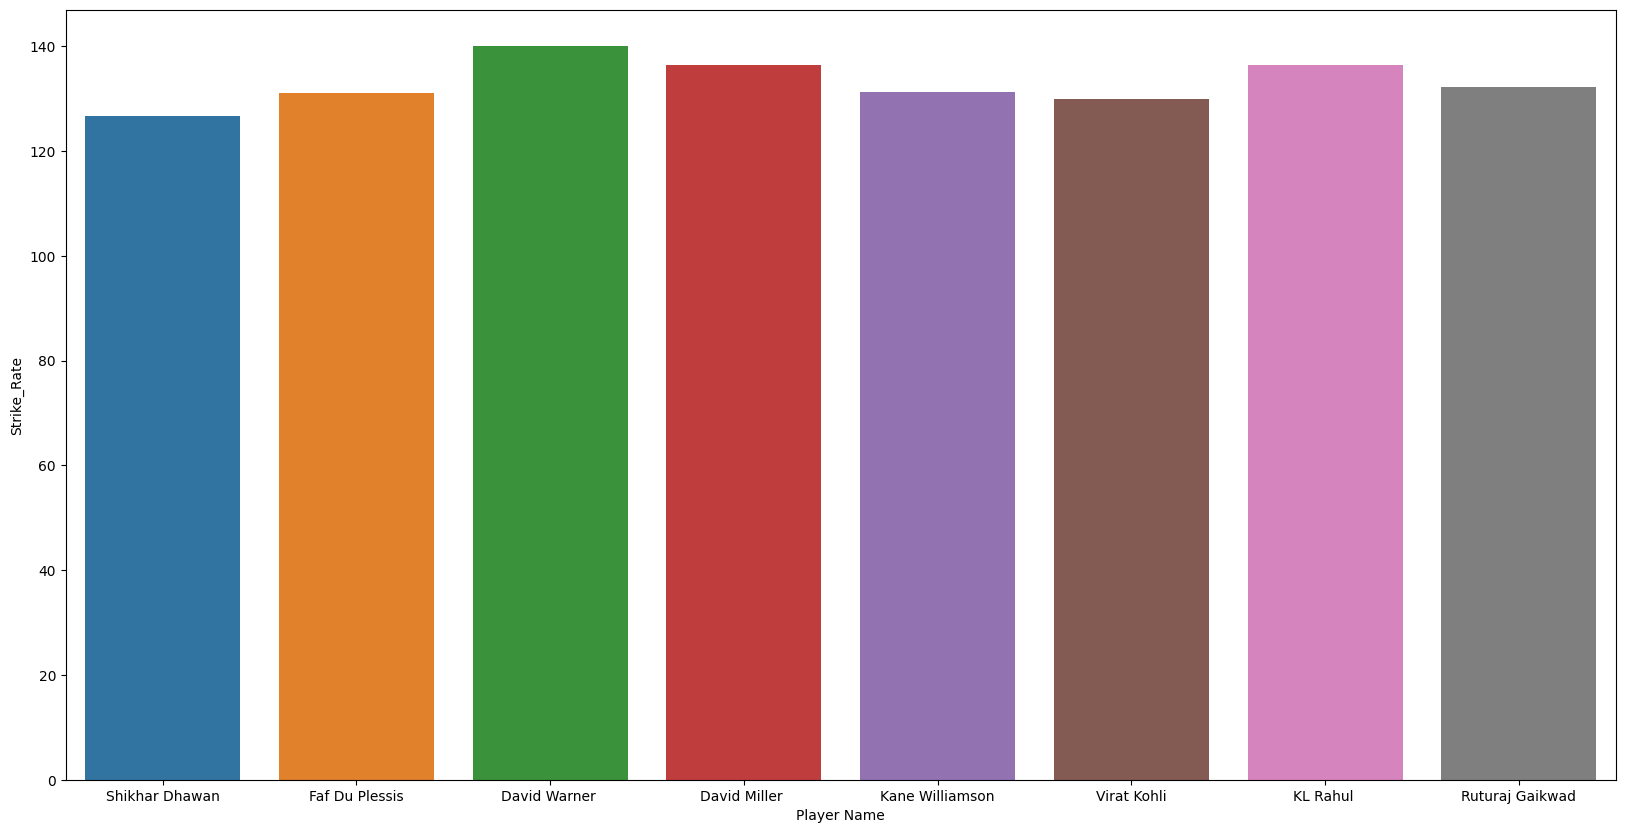

In [75]:
#Visualization of Batters Data
#the plot shows each of the top patters strike rate.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_batters)

<AxesSubplot: xlabel='Player Name', ylabel='Runs'>

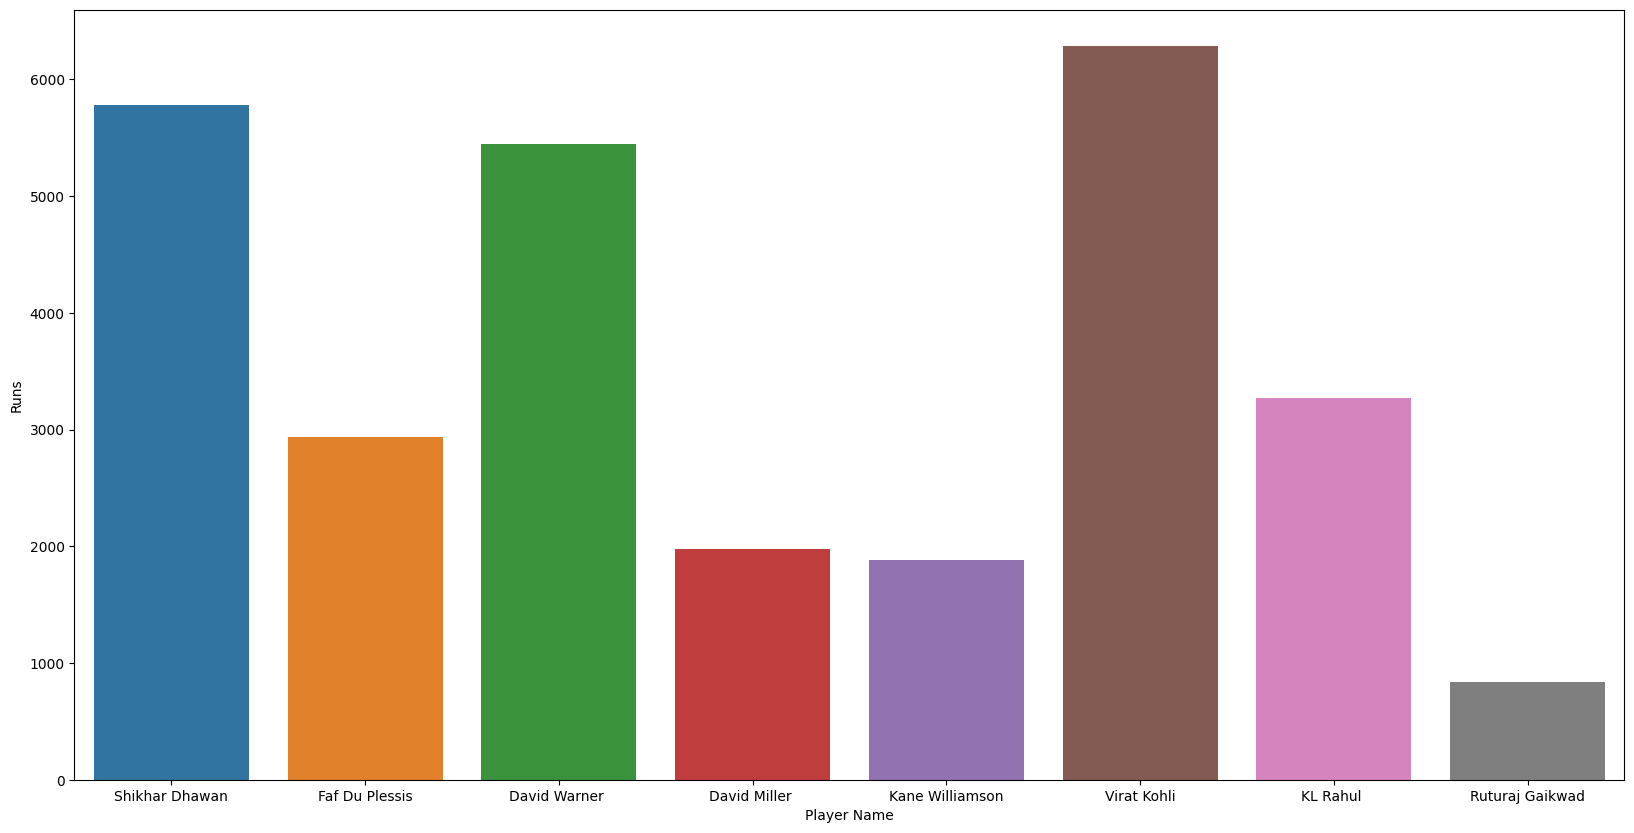

In [76]:
#the plot shows each of the top patters Runs.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data=top_batters)

<AxesSubplot: xlabel='Player Name', ylabel='Average'>

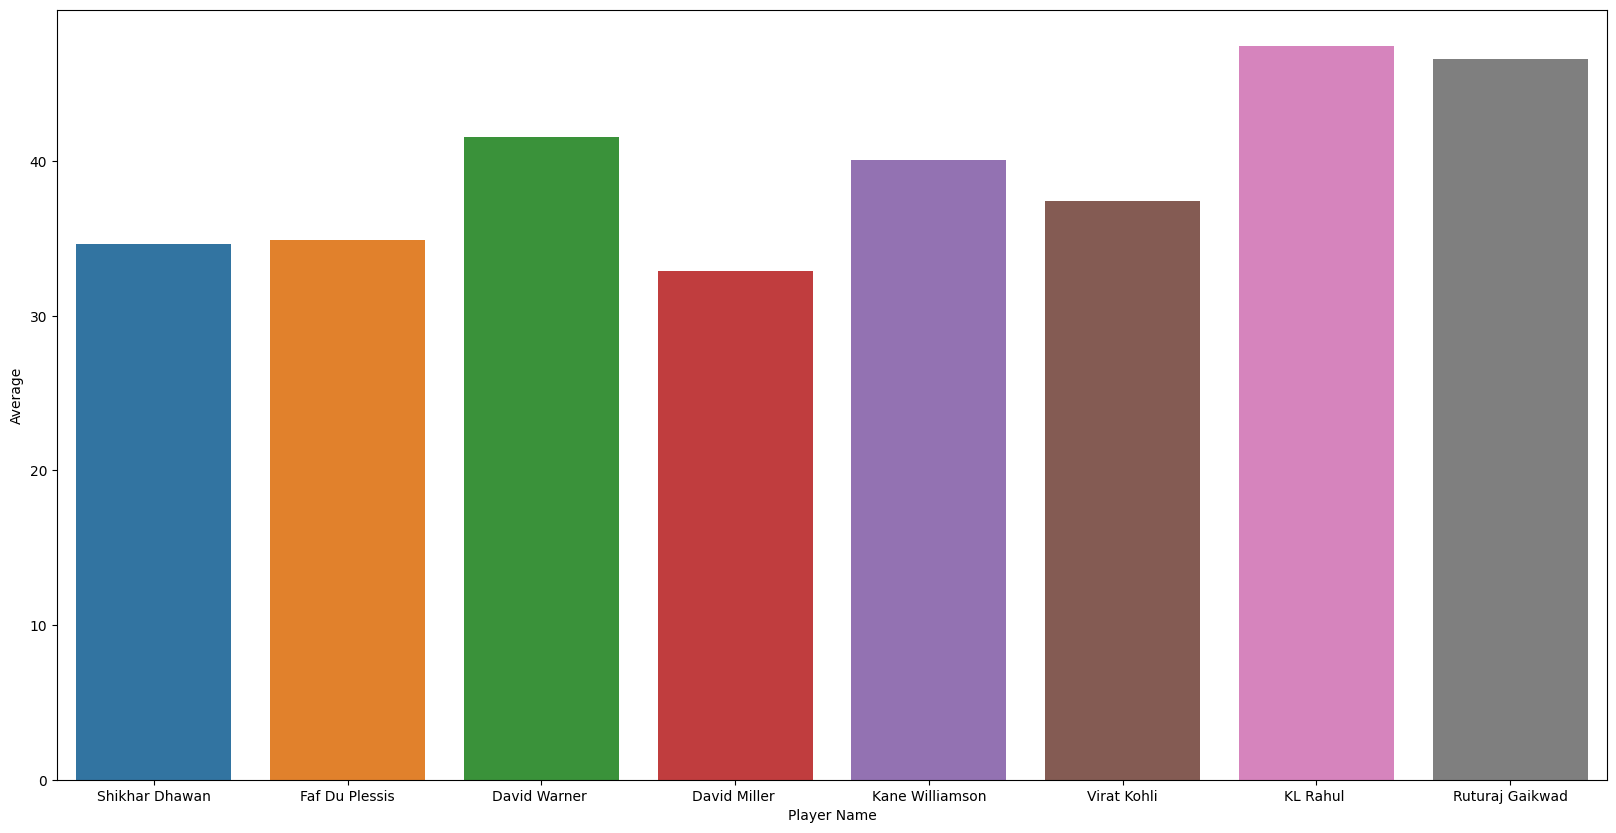

In [78]:
#the plot shows each of the top patters Averages.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Average', data=top_batters)

<AxesSubplot: xlabel='Player Name', ylabel='Matches_Played'>

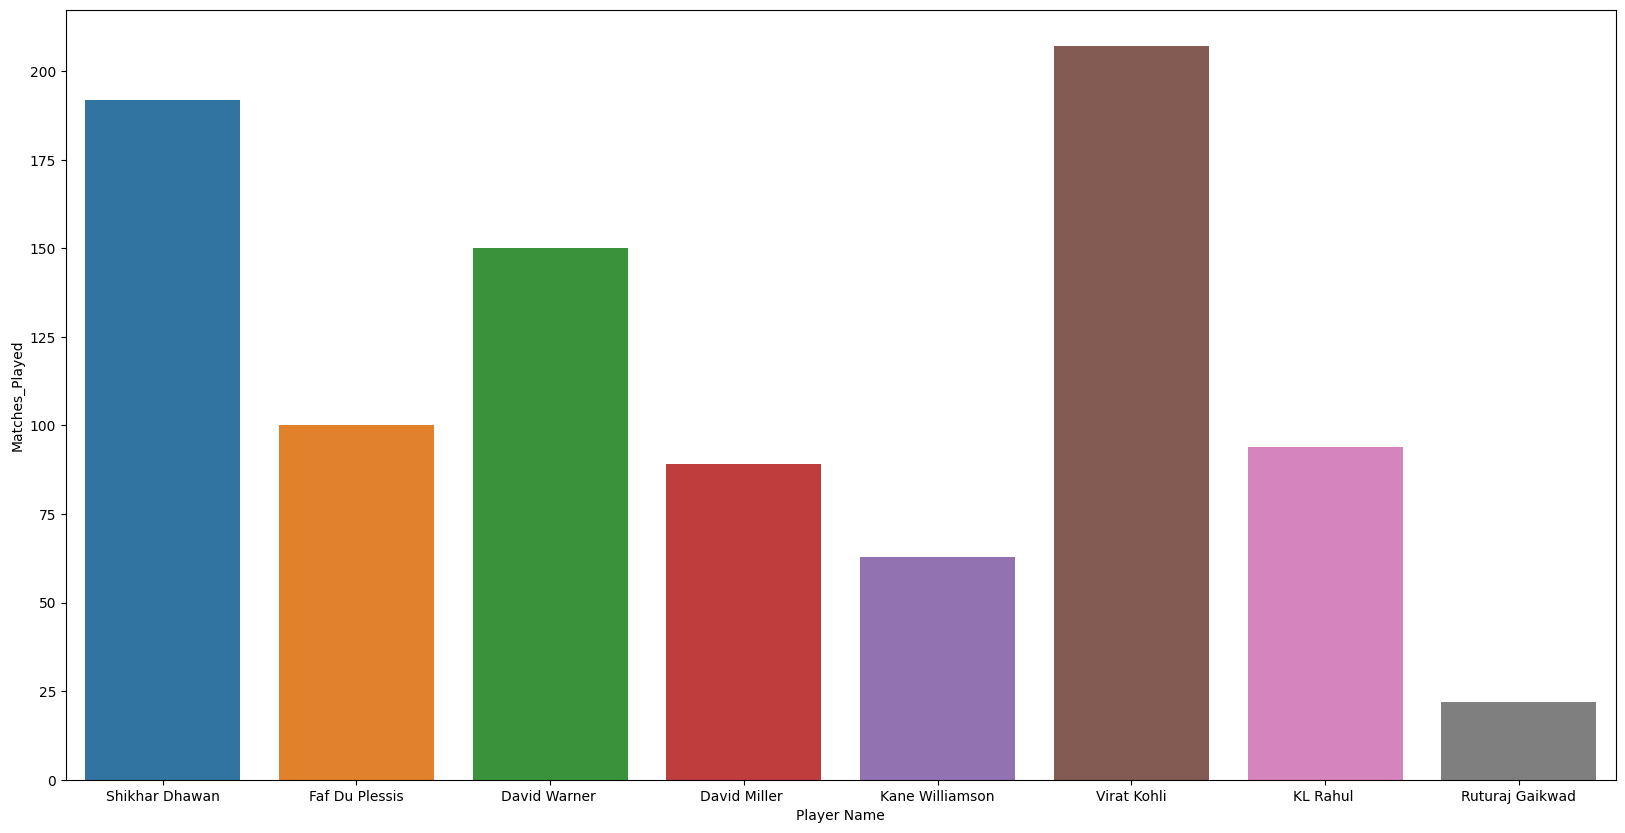

In [80]:
#the plot shows each of the top patters Matches Played.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_batters)

<AxesSubplot: xlabel='Player Name', ylabel='Bowling_average'>

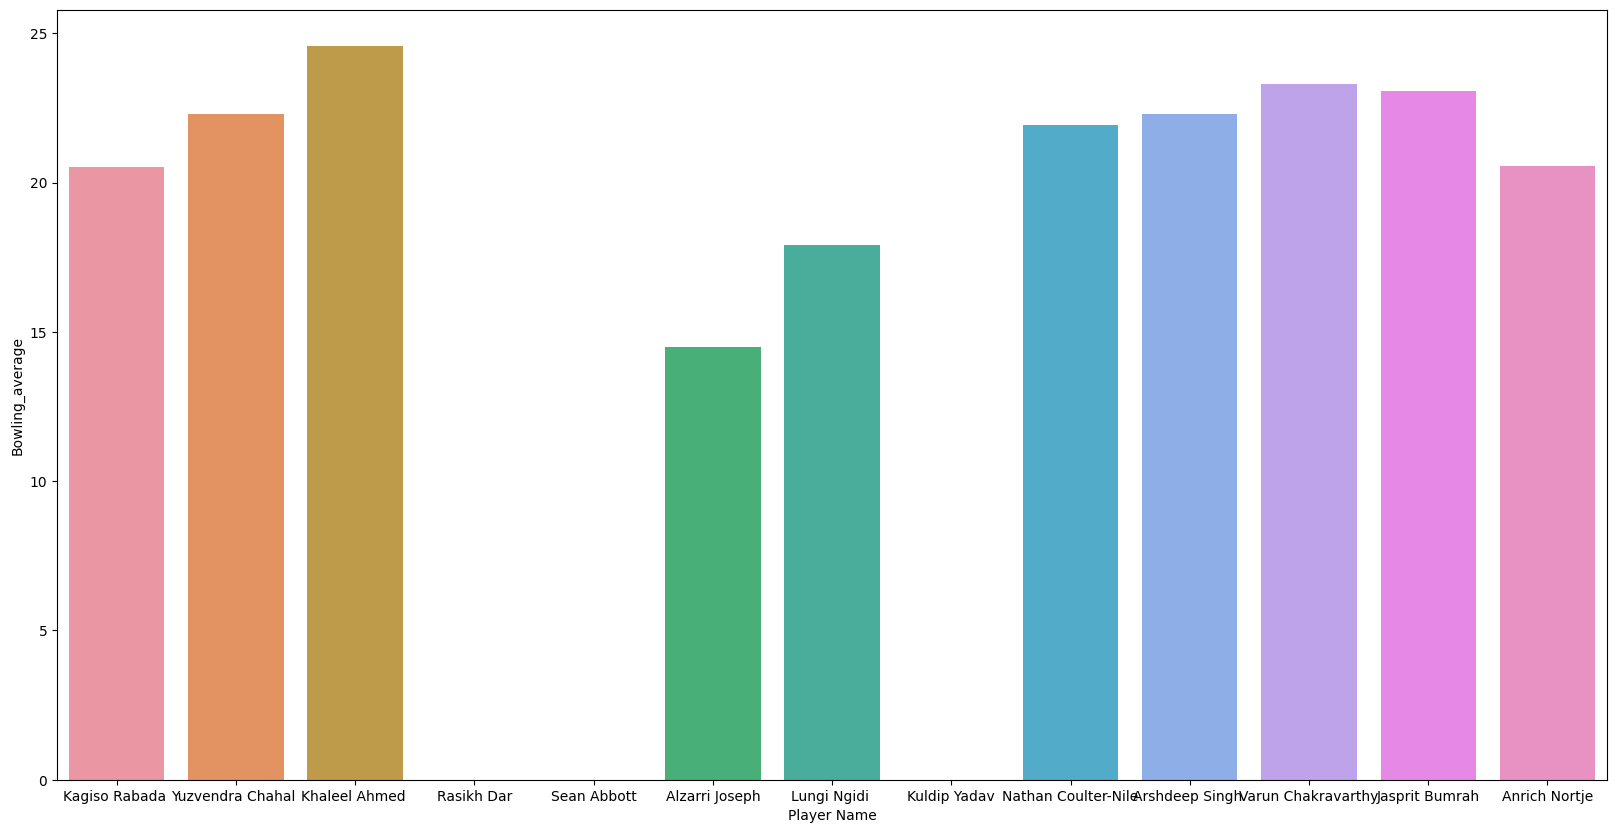

In [81]:
#Visualization of the Bowlers Data
#this plot shows the bowling average of each of the top bowlers. 
plt.figure(figsize=(20,10))
sns.barplot (x='Player Name', y='Bowling_average', data=top_bowlers)

<AxesSubplot: xlabel='Player Name', ylabel='Economy'>

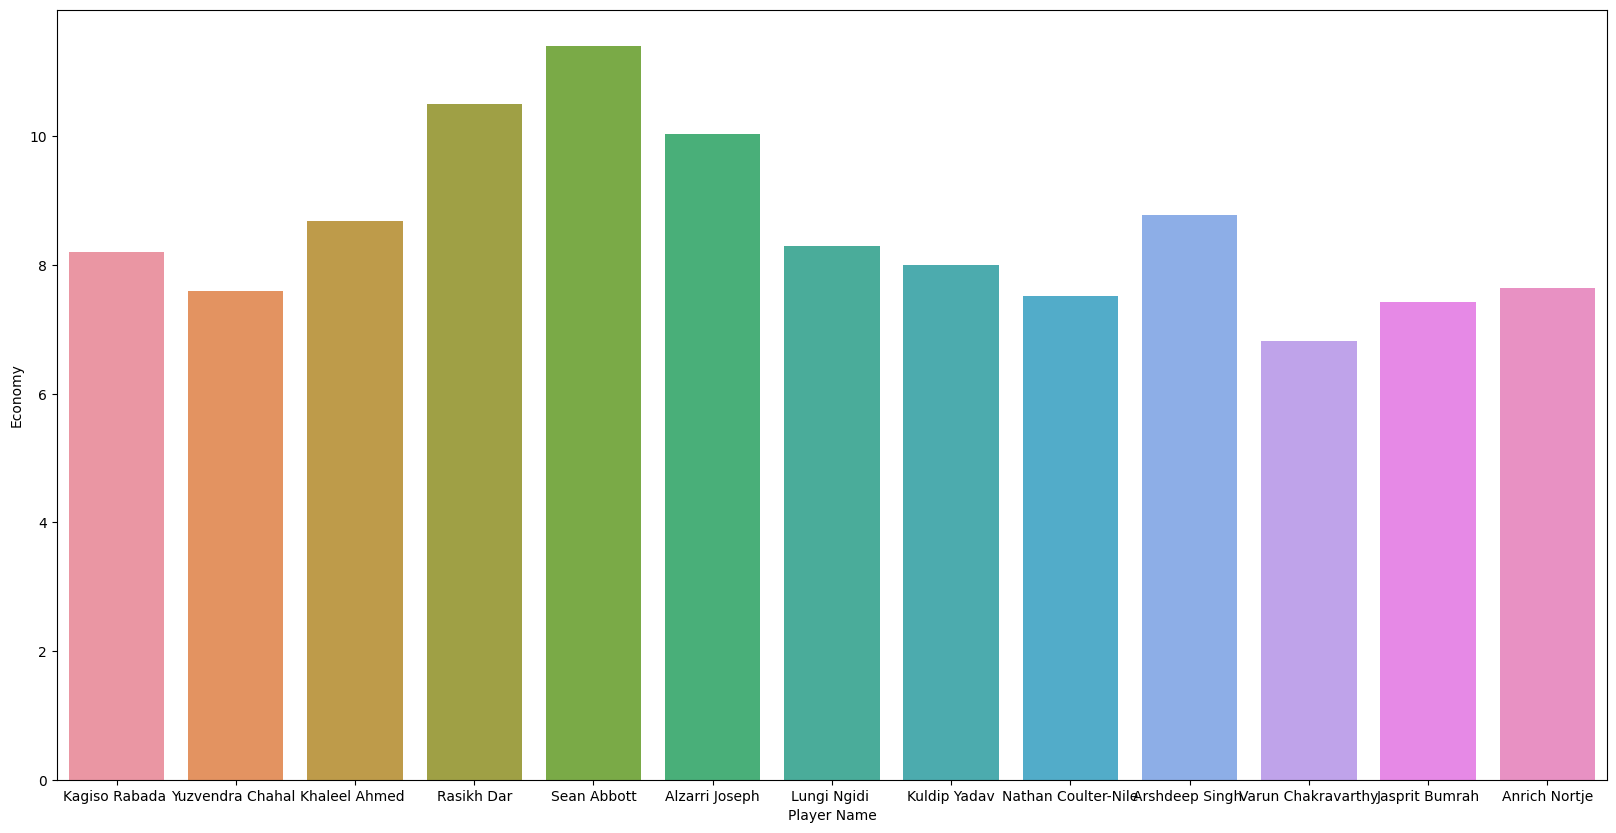

In [82]:
#this plot shows the bowling Economy of each of the top bowlers. 
plt.figure(figsize=(20,10))
sns.barplot (x='Player Name', y='Economy', data=top_bowlers)

<AxesSubplot: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

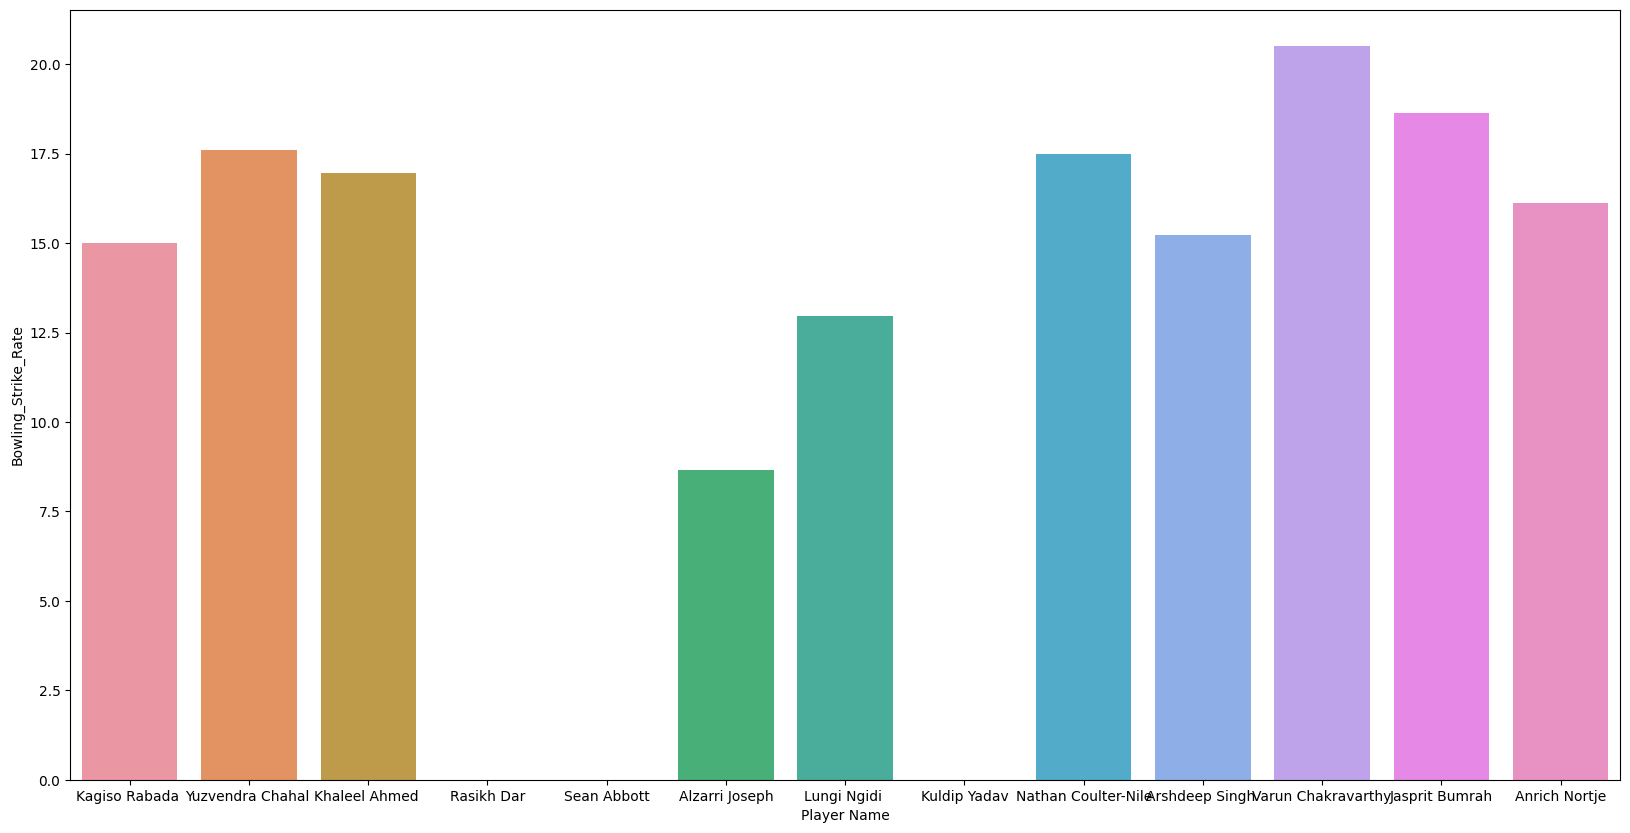

In [85]:
#this plot shows the bowling Economy of each of the top bowlers. 
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Bowling_Strike_Rate', data=top_bowlers)

<AxesSubplot: xlabel='Player Name', ylabel='Strike_Rate'>

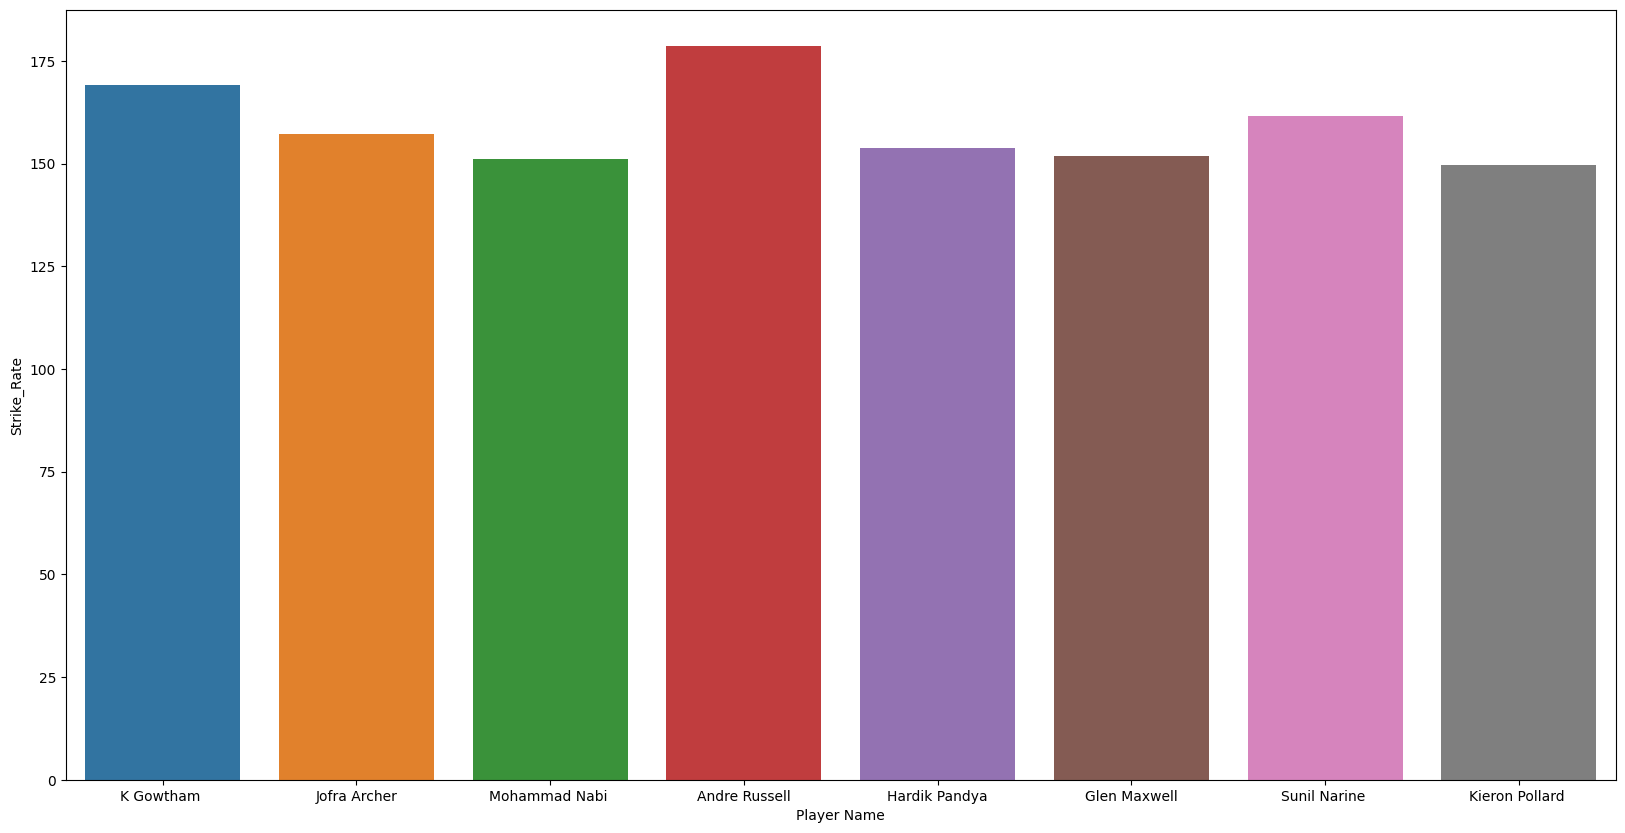

In [87]:
#Visualization of the Allrounders Data
#this plot shows the strike rate of top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_allrounders)

<AxesSubplot: xlabel='Player Name', ylabel='Matches_Played'>

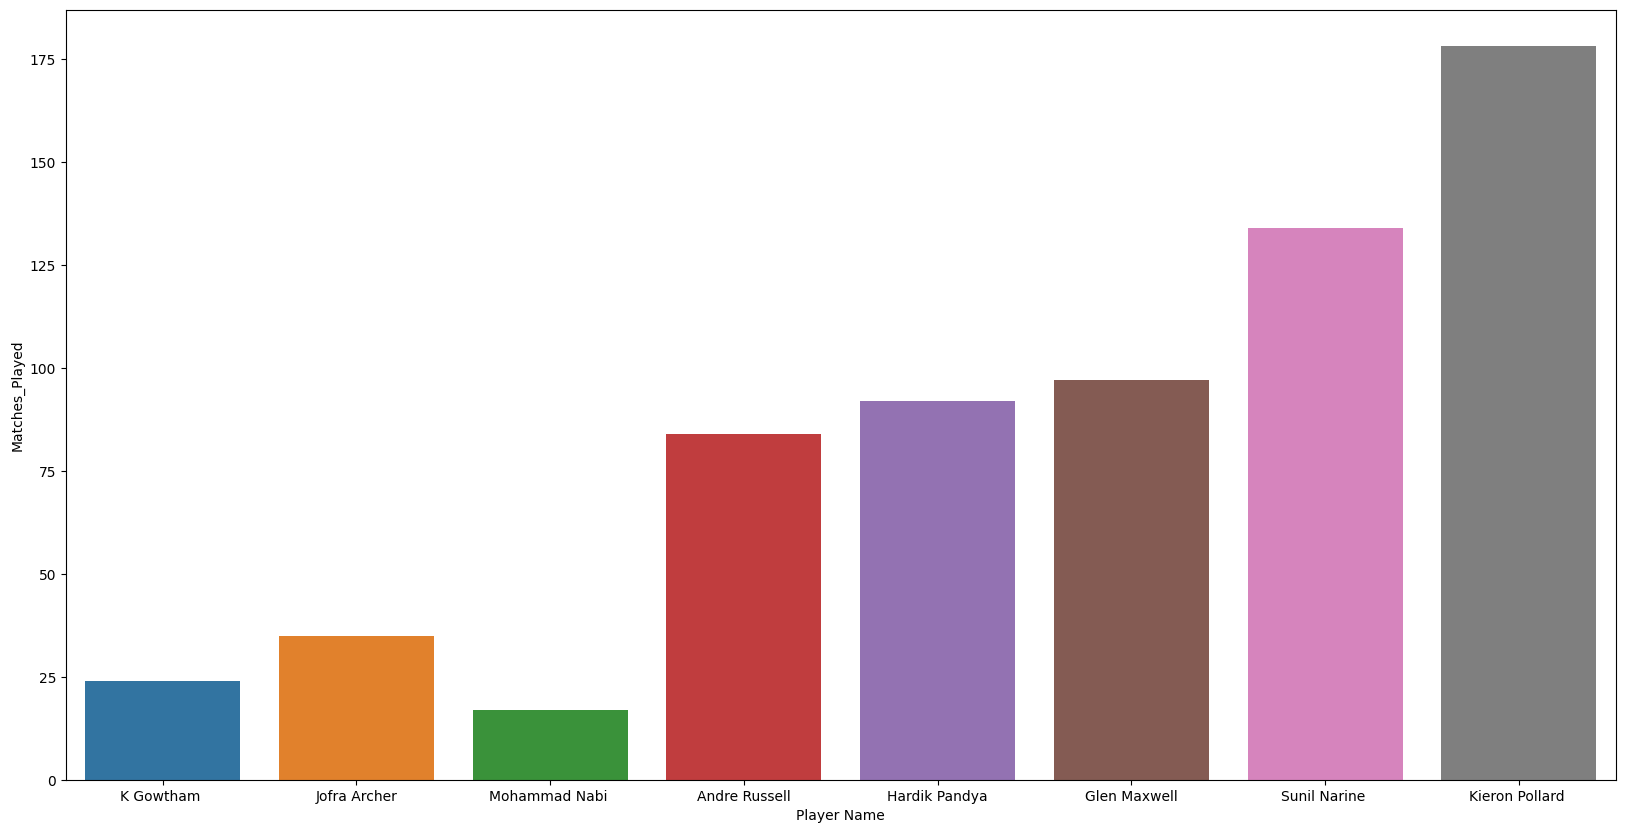

In [88]:
#Visualization of the Allrounders Data
#this plot shows the Matches Played of top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_allrounders)

<AxesSubplot: xlabel='Player Name', ylabel='Runs'>

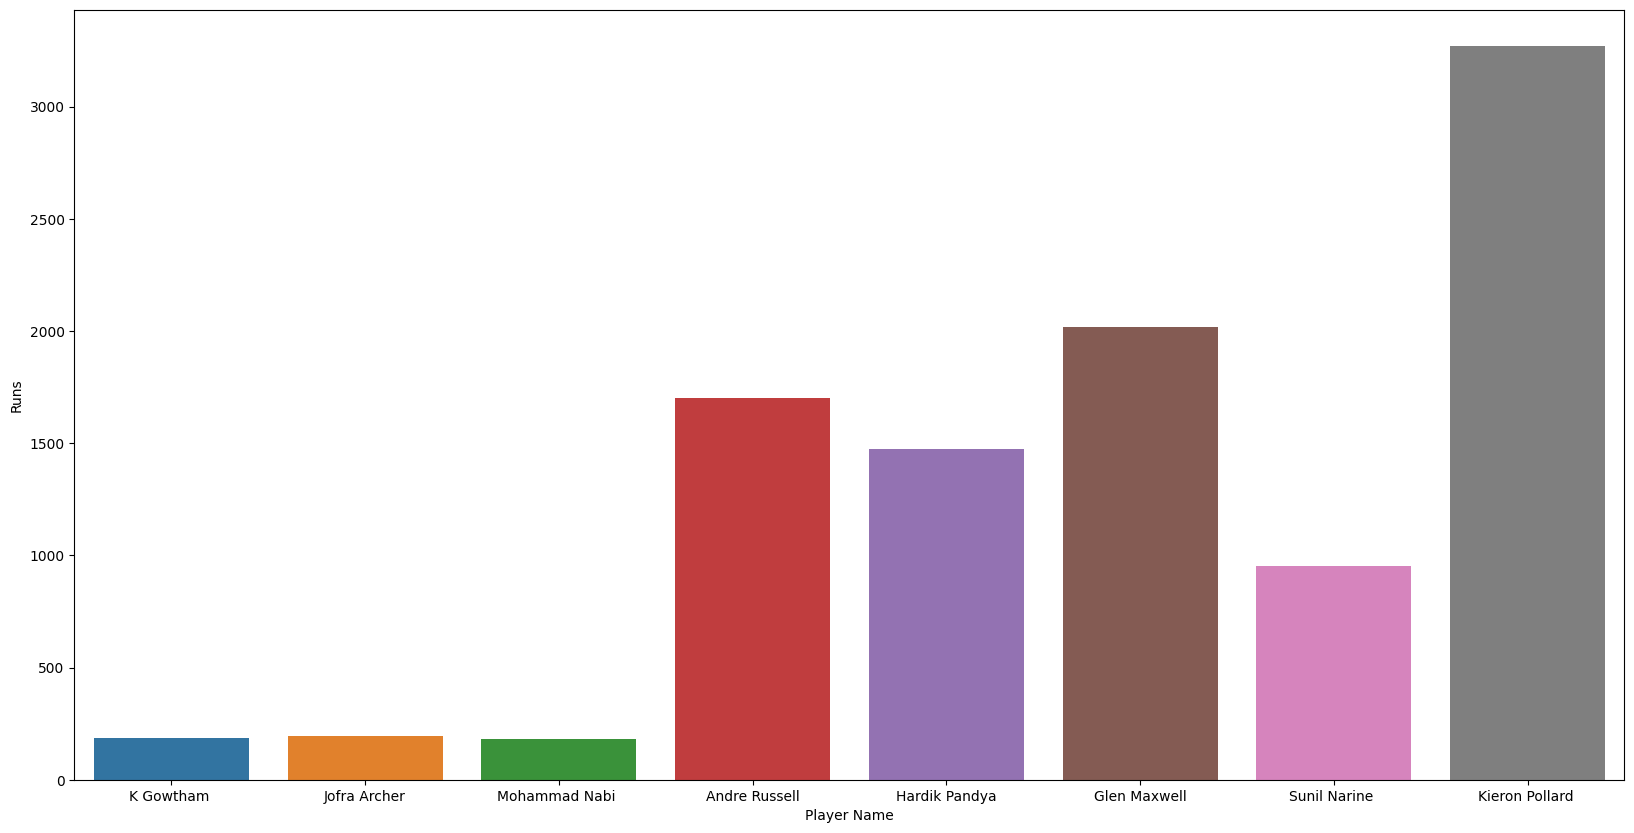

In [89]:
#Visualization of the Allrounders Data
#this plot shows the Runs of top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data=top_allrounders)

<AxesSubplot: xlabel='Player Name', ylabel='Bowling_average'>

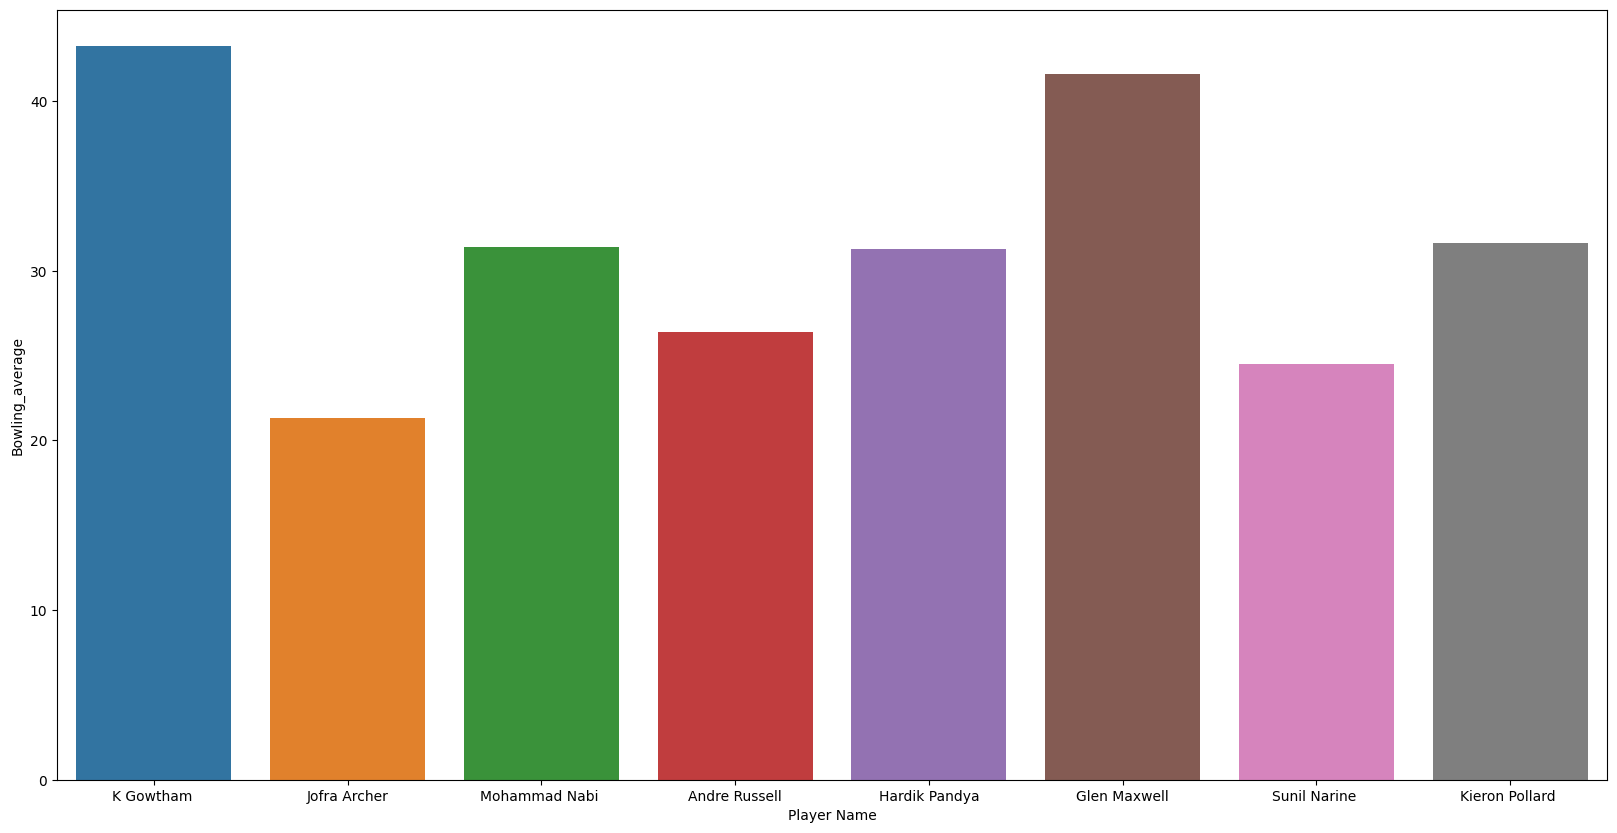

In [90]:
#Visualization of the Allrounders Data
#this plot shows the Bowling Avg of top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Bowling_average', data=top_allrounders)

<AxesSubplot: xlabel='Player Name', ylabel='Economy'>

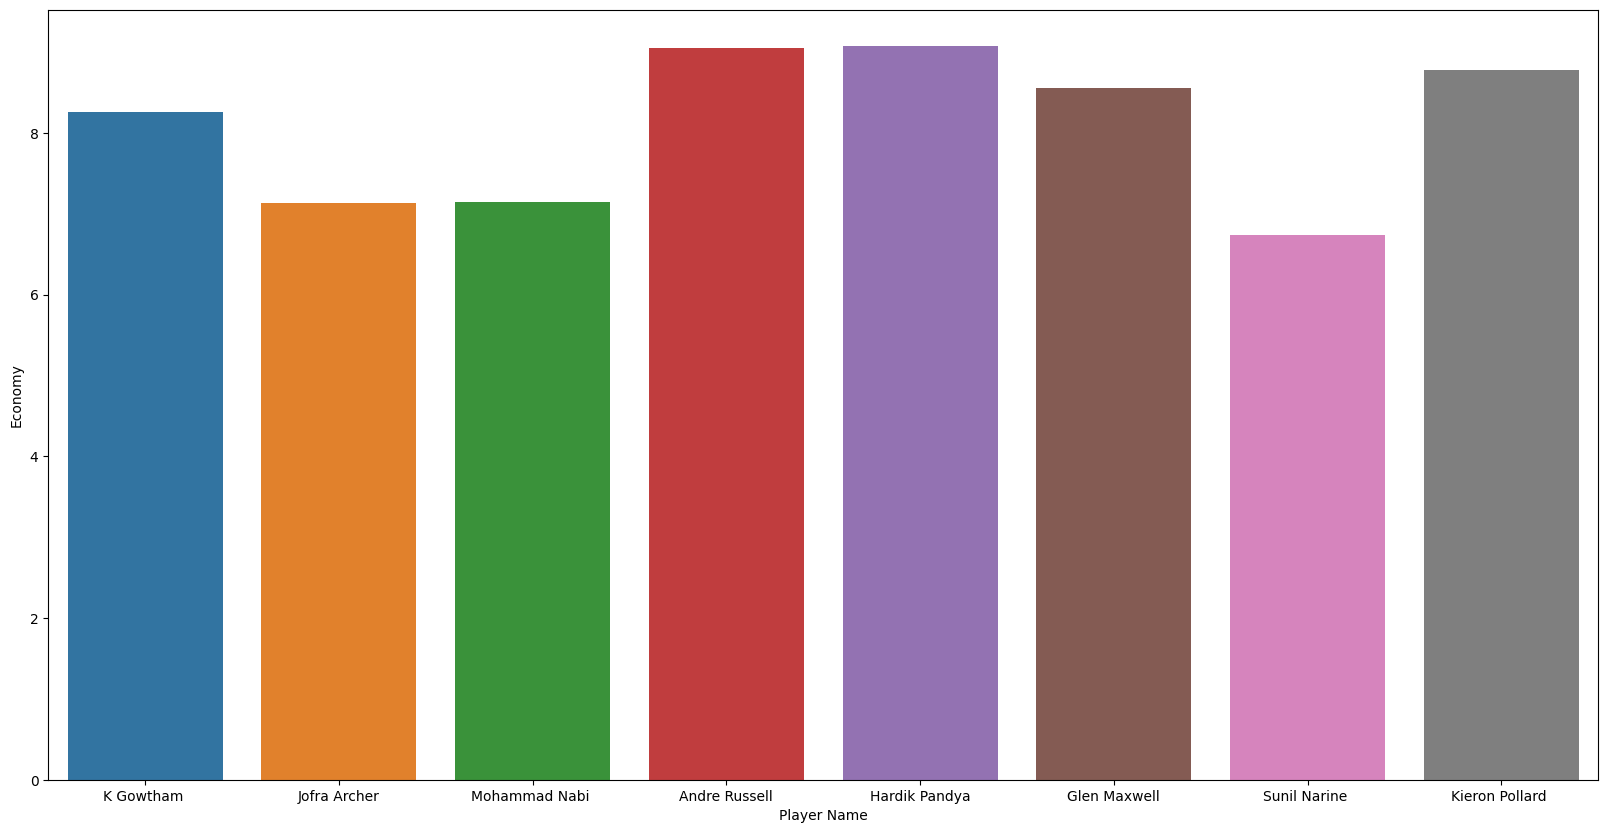

In [92]:
#Visualization of the Allrounders Data
#this plot shows the Economy of top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Economy', data=top_allrounders)

<AxesSubplot: xlabel='Player Name', ylabel='Wickets'>

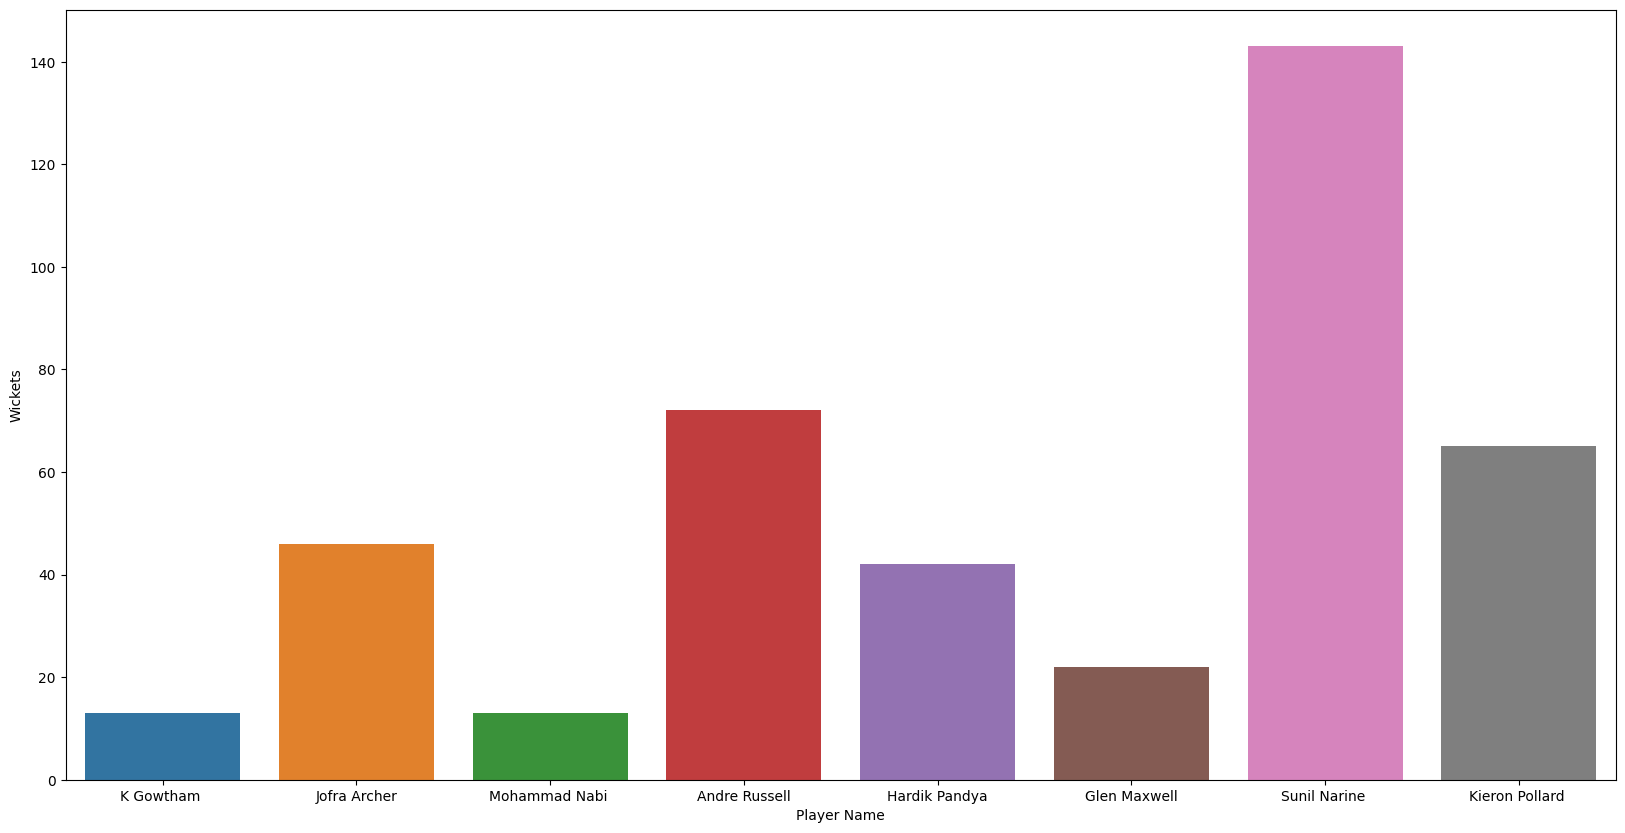

In [93]:
#Visualization of the Allrounders Data
#this plot shows the Wickets of top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Wickets', data=top_allrounders)

<AxesSubplot: xlabel='Player Name', ylabel='Average'>

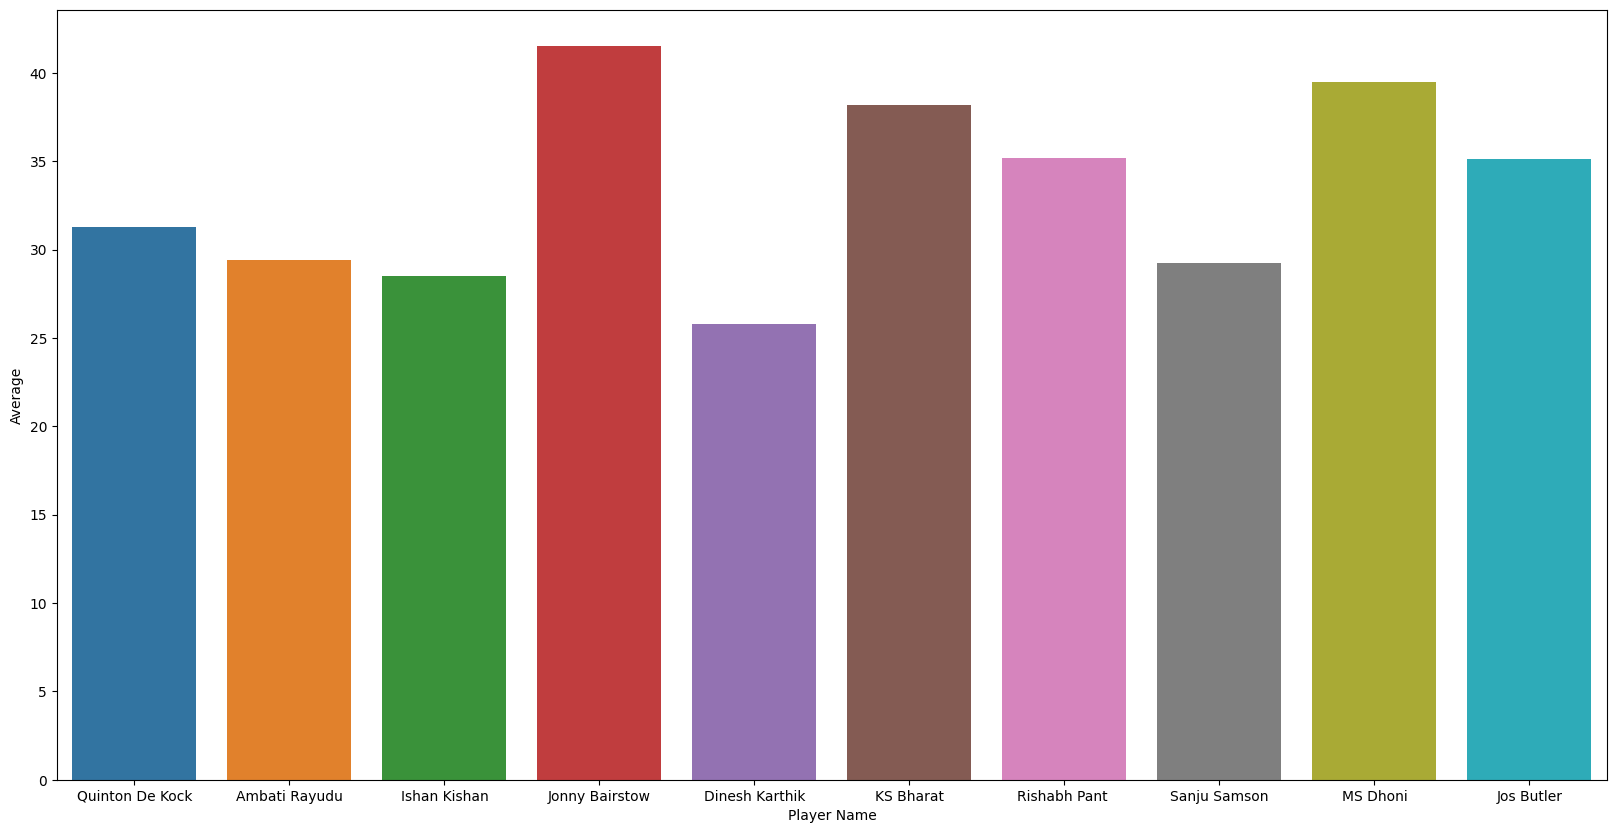

In [94]:
#Visualization of the Keepers Data
#this plot shows the average of top keepers.
plt.figure(figsize=(20,10))
sns.barplot (x='Player Name', y='Average', data= top_keepers)

<AxesSubplot: xlabel='Player Name', ylabel='Catches'>

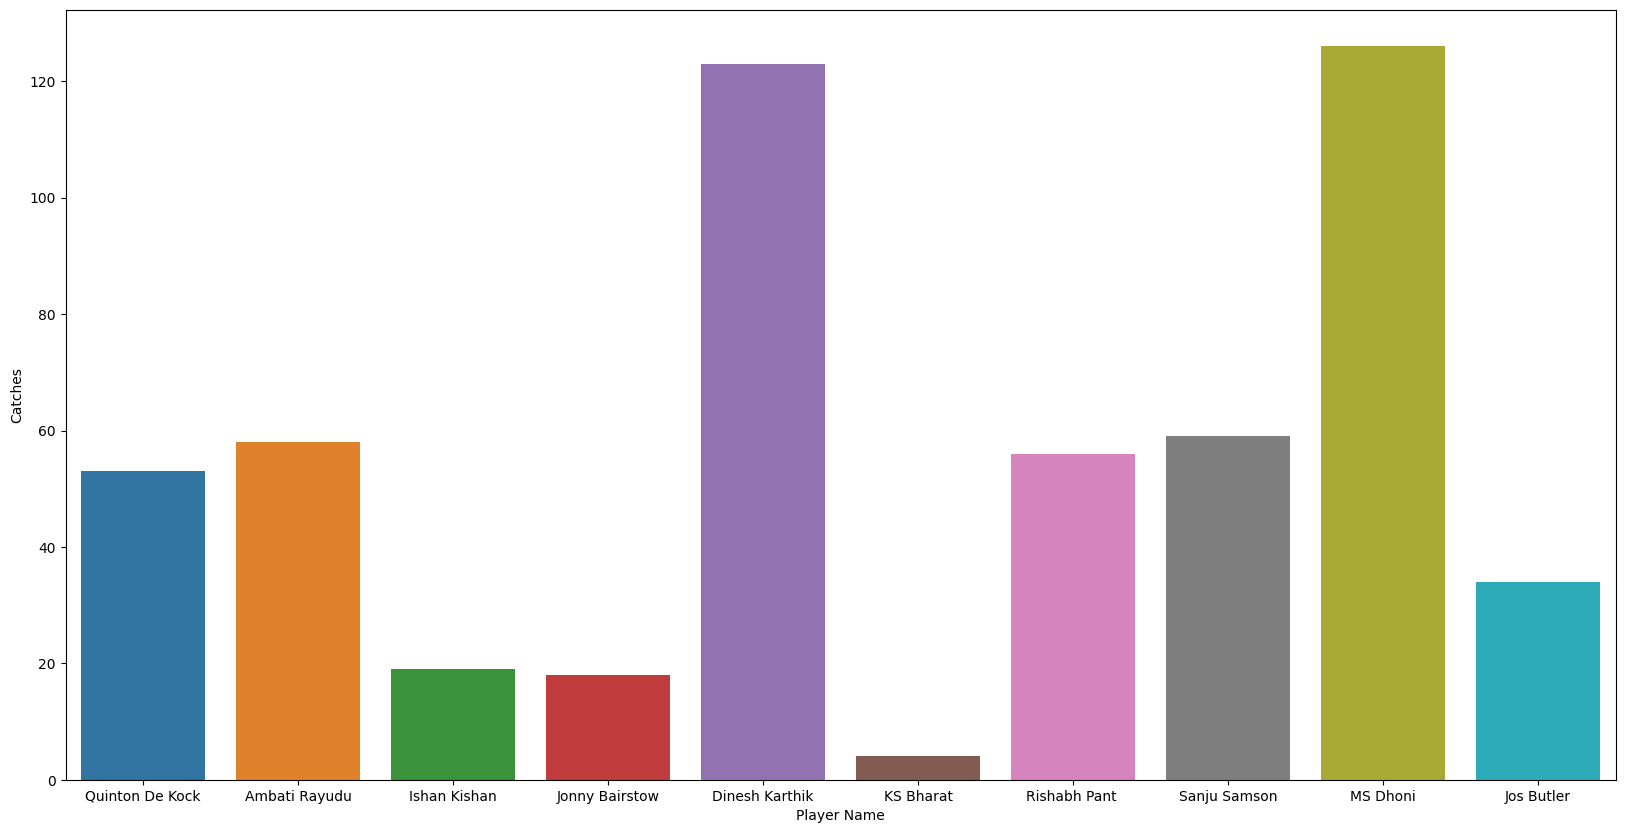

In [95]:
#Visualization of the Keepers Data
#this plot shows the Catches of top keepers.
plt.figure(figsize=(20,10))
sns.barplot (x='Player Name', y='Catches', data= top_keepers)

<AxesSubplot: xlabel='Player Name', ylabel='Run_outs'>

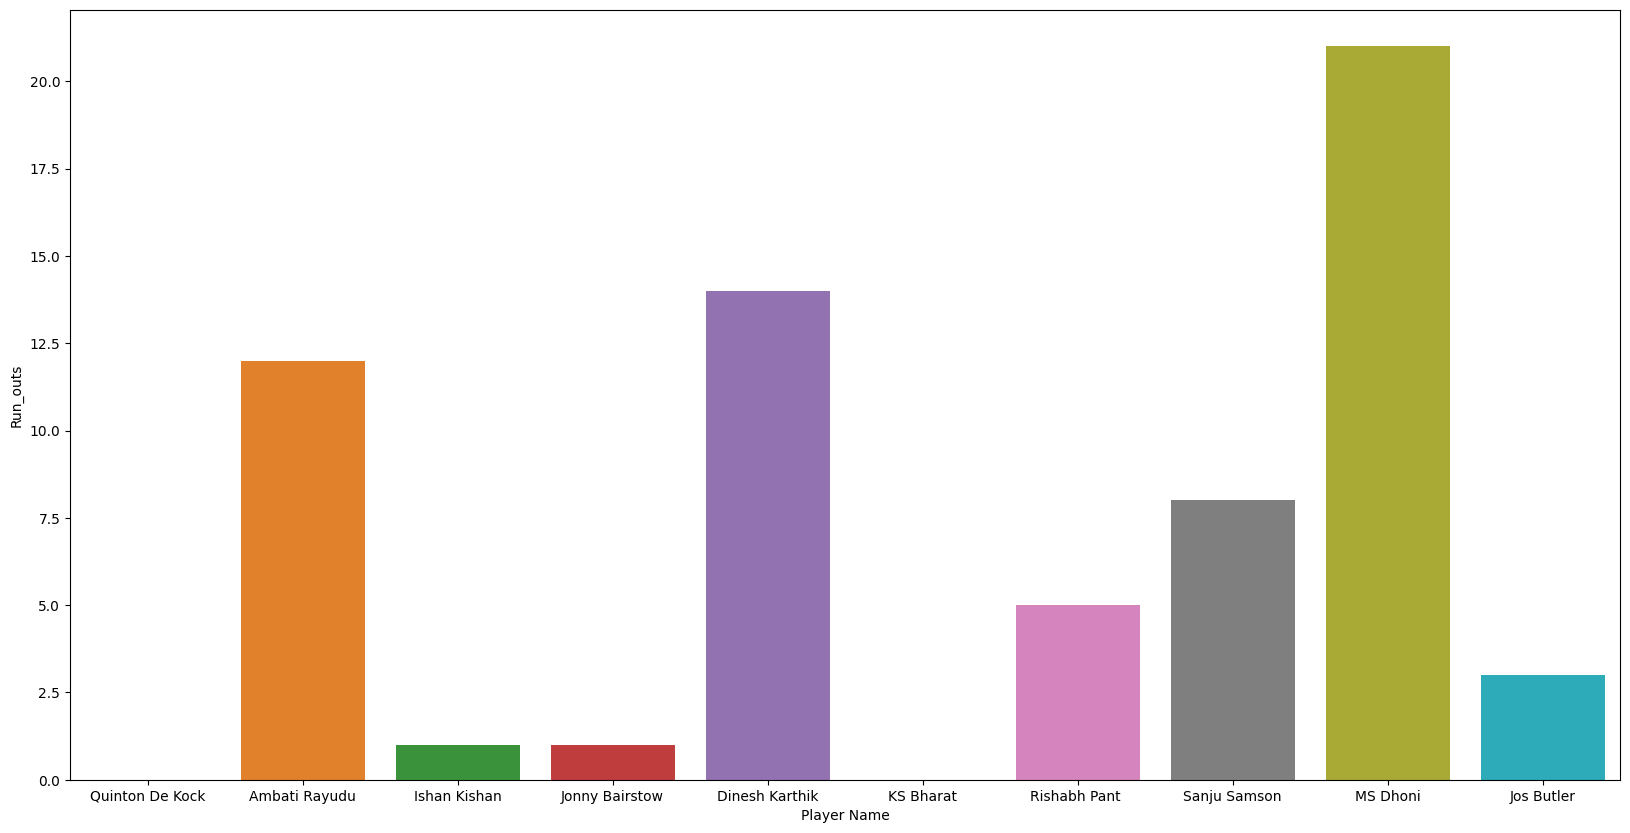

In [96]:
#Visualization of the Keepers Data
#this plot shows the Run Outs by keepers.
plt.figure(figsize=(20,10))
sns.barplot (x='Player Name', y='Run_outs', data= top_keepers)

Forming Our Best 11 for the Campaign based on the above analysis
1. We will consider the number of players from each category that the t20 world cup winning and the last year's IPL winning team played in their Final matches.
2. The Australia squad consisted of - 3 Batters, 3 Allrounders, 4 Bowlers with 1 spin option and 1 wicket keeper.
3. The Chennai Squad Consisted of-4 Batters, 3 Allrounders, 3 Bowlers and 1 Wicket Keeper.
4. For our final analysis we will consider the ratio of players in the best 11 as follows:
1.3 Batters
2. 3 Allrounders
3.4 Bowlers with 2 Spin Options
4. 1 Wicket Keeper

<AxesSubplot: title={'center': 'Average'}>

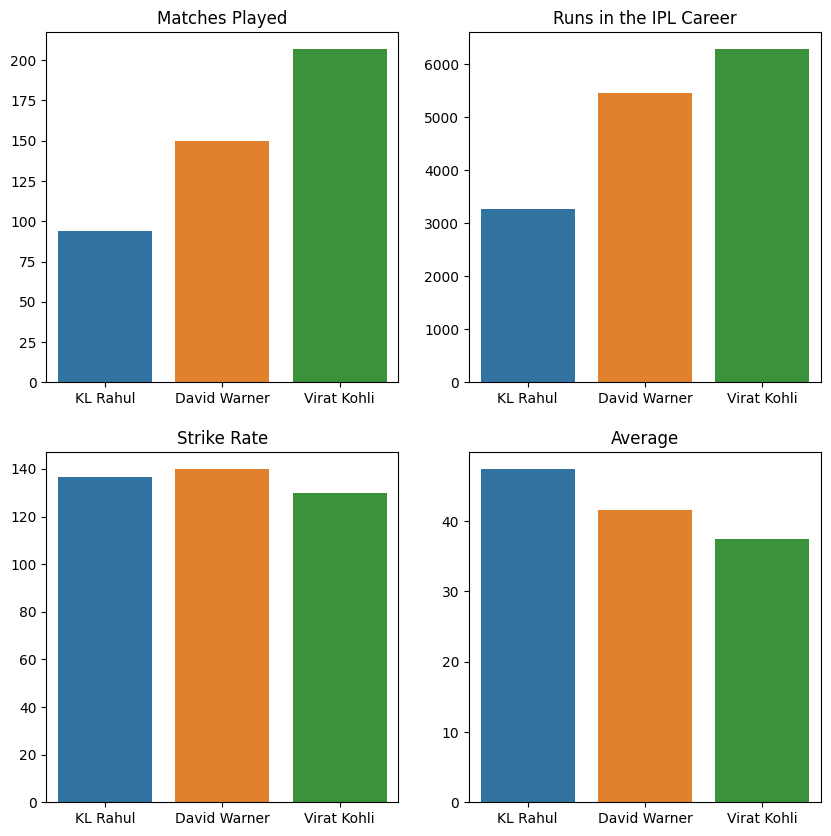

In [101]:
#Batters for the Final 11 KL Rahul, Virat Kohli, David Warner
#here, we are storing the values of each player in a separate dataframe to use for displaying using the barplot. 
top_batters.reset_index(drop=True)
matches_values = [top_batters.iloc[6]['Matches_Played'], top_batters.iloc[2]['Matches_Played'], top_batters.iloc[5]['Matches_Played']] 
runs_values = [top_batters.iloc[6]['Runs'], top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
average_values = [top_batters.iloc[6]['Average'], top_batters.iloc[2]['Average'], top_batters.iloc[5]['Average']]
Strike_rate_values = [top_batters.iloc[6]['Strike_Rate'], top_batters.iloc[2]['Strike_Rate'], top_batters.iloc[5]['Strike_Rate']] 
Labels = ['KL Rahul', 'David Warner', 'Virat Kohli']
                                                                                                                    
fig, axes = plt.subplots (2,2, figsize=(10,10)) 
axes[0][0].set_title("Matches Played") 
axes[0][1].set_title("Runs in the IPL Career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
sns.barplot(x=Labels, y= matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1]) 
sns.barplot(x=Labels, y=Strike_rate_values, ax=axes[1][0]) 
sns.barplot(x=Labels, y=average_values, ax=axes[1][1])


<AxesSubplot: title={'center': 'Economy'}>

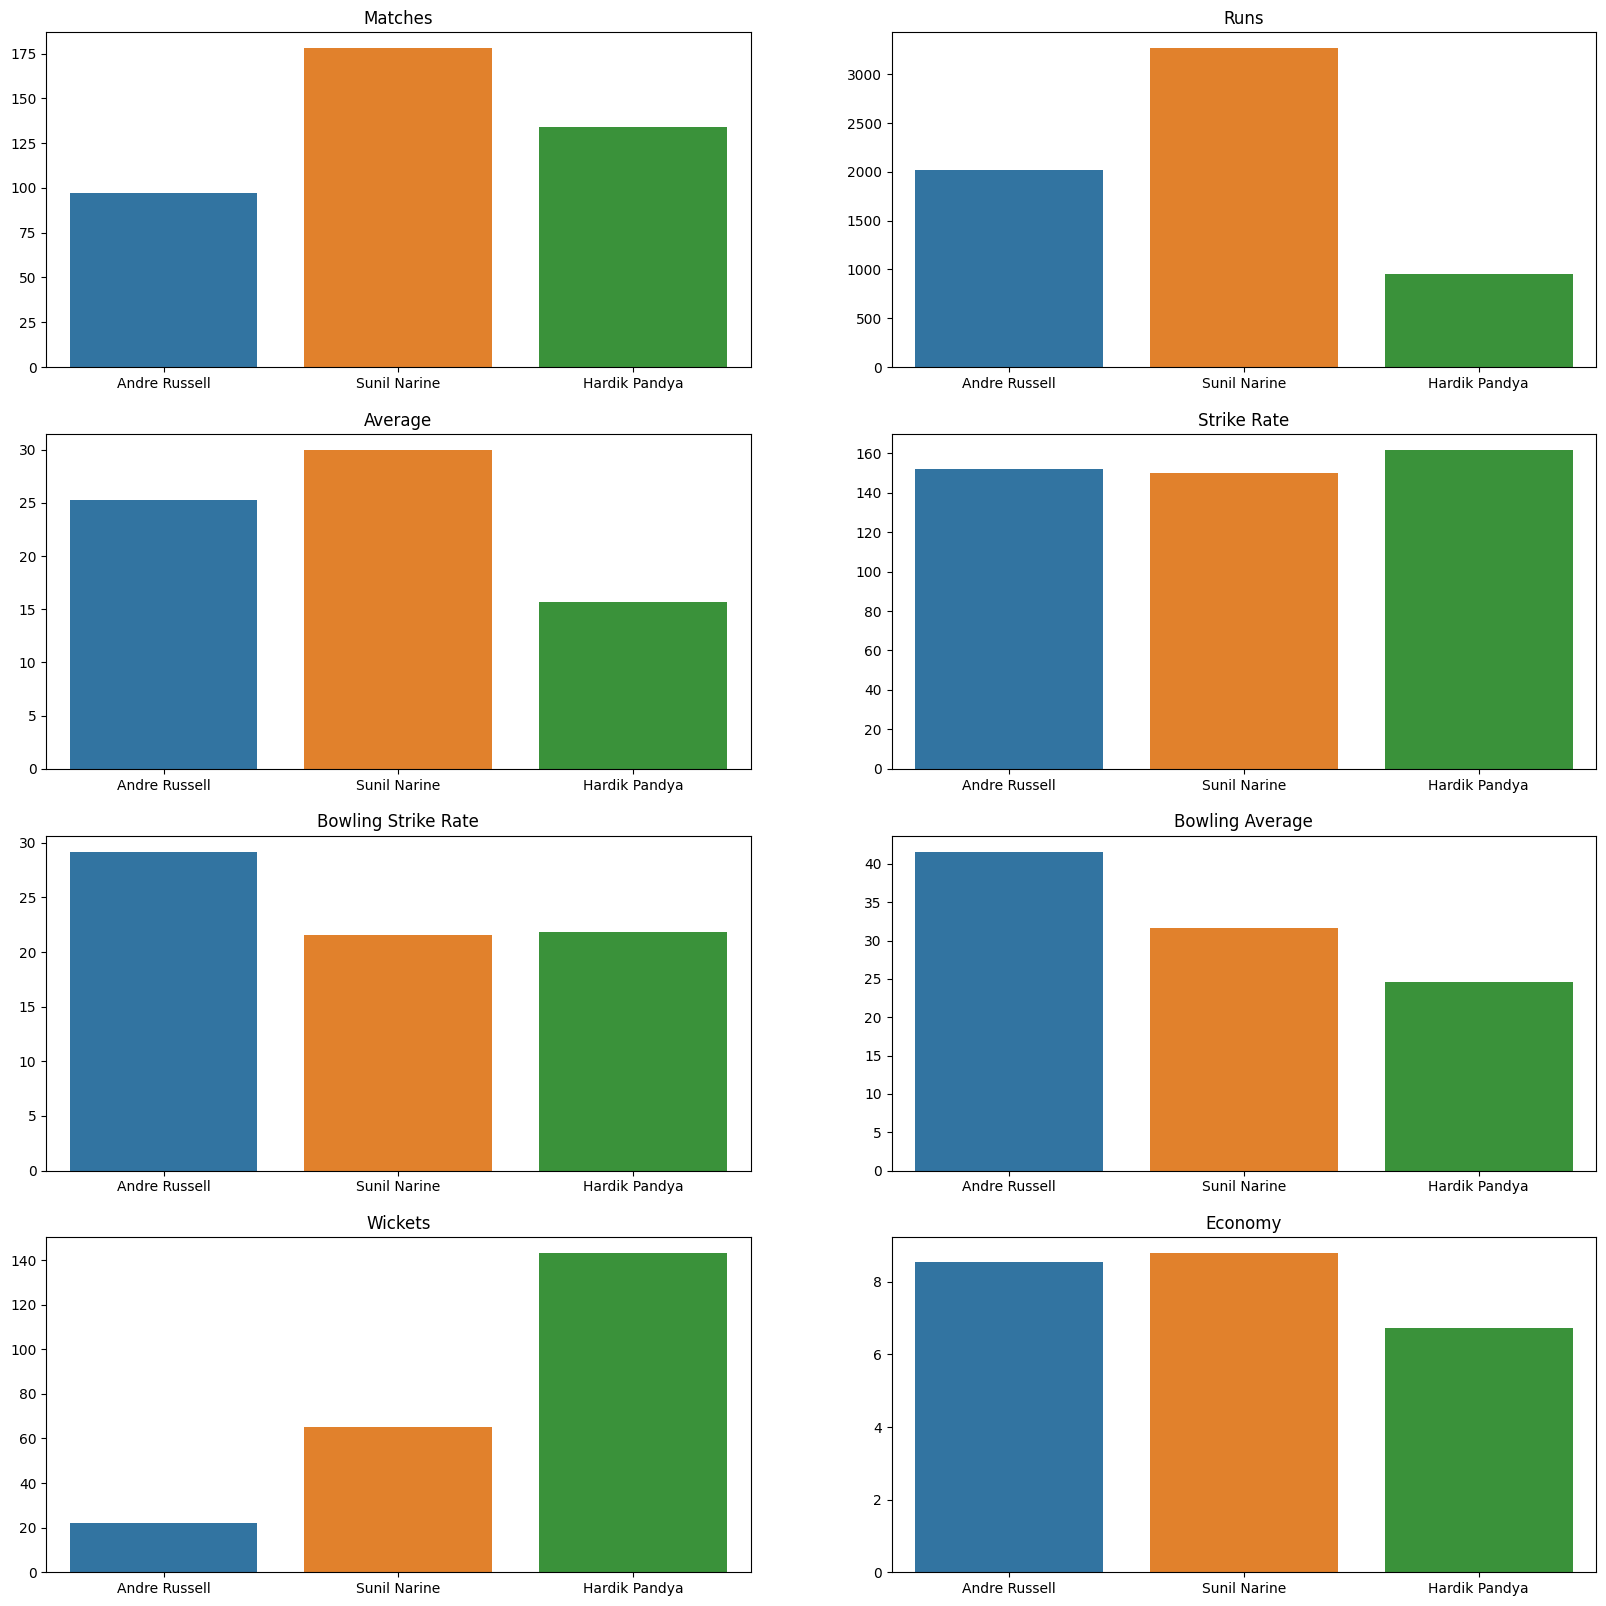

In [112]:
#Allrounders for the final 11 - Andre Russell, Sunil Narine, Hardik Pandya
top_allrounders.reset_index(drop=True)
matches_values = [top_allrounders.iloc[5]['Matches_Played'],top_allrounders.iloc[7]['Matches_Played'], top_allrounders.iloc[6]['Matches_Played']]
runs_values = [top_allrounders.iloc[5]['Runs'], top_allrounders.iloc[7]['Runs'], top_allrounders.iloc[6]['Runs']]
average_values = [top_allrounders.iloc[5]['Average'], top_allrounders.iloc[7]['Average'], top_allrounders.iloc[6]['Average']]
strike_rate_values = [top_allrounders.iloc[5]['Strike_Rate'], top_allrounders.iloc[7]['Strike_Rate'], top_allrounders.iloc[6]['Strike_Rate']]
bowling_strike_rate_values = [top_allrounders.iloc[5]['Bowling_Strike_Rate'], top_allrounders.iloc[7]['Bowling_Strike_Rate'], top_allrounders.iloc[6]['Bowling_Strike_Rate']]
bowling_average_values = [top_allrounders.iloc[5]['Bowling_average'], top_allrounders.iloc[7]['Bowling_average'], top_allrounders.iloc[6]['Bowling_average']] 
wickets_values = [top_allrounders.iloc[5]['Wickets'], top_allrounders.iloc[7]['Wickets'], top_allrounders.iloc[6]['Wickets']]
economy_values = [top_allrounders.iloc[5]['Economy'], top_allrounders.iloc[7]['Economy'], top_allrounders.iloc[6]['Economy']]
Labels = ['Andre Russell', 'Sunil Narine', 'Hardik Pandya']
fig, axes = plt.subplots(4,2, figsize=(20,20))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Strike Rate") 
axes[2][1].set_title("Bowling Average") 
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")
sns.barplot(x=Labels, y=matches_values, ax=axes[0][0]) 
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=average_values, ax=axes[1][0]) 
sns.barplot(x=Labels, y=strike_rate_values, ax=axes[1][1])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[2][0])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[2][1])
sns.barplot(x=Labels, y=wickets_values, ax=axes[3][0])
sns.barplot(x=Labels, y=economy_values, ax=axes[3][1])

<AxesSubplot: title={'center': 'Keeping Stats'}>

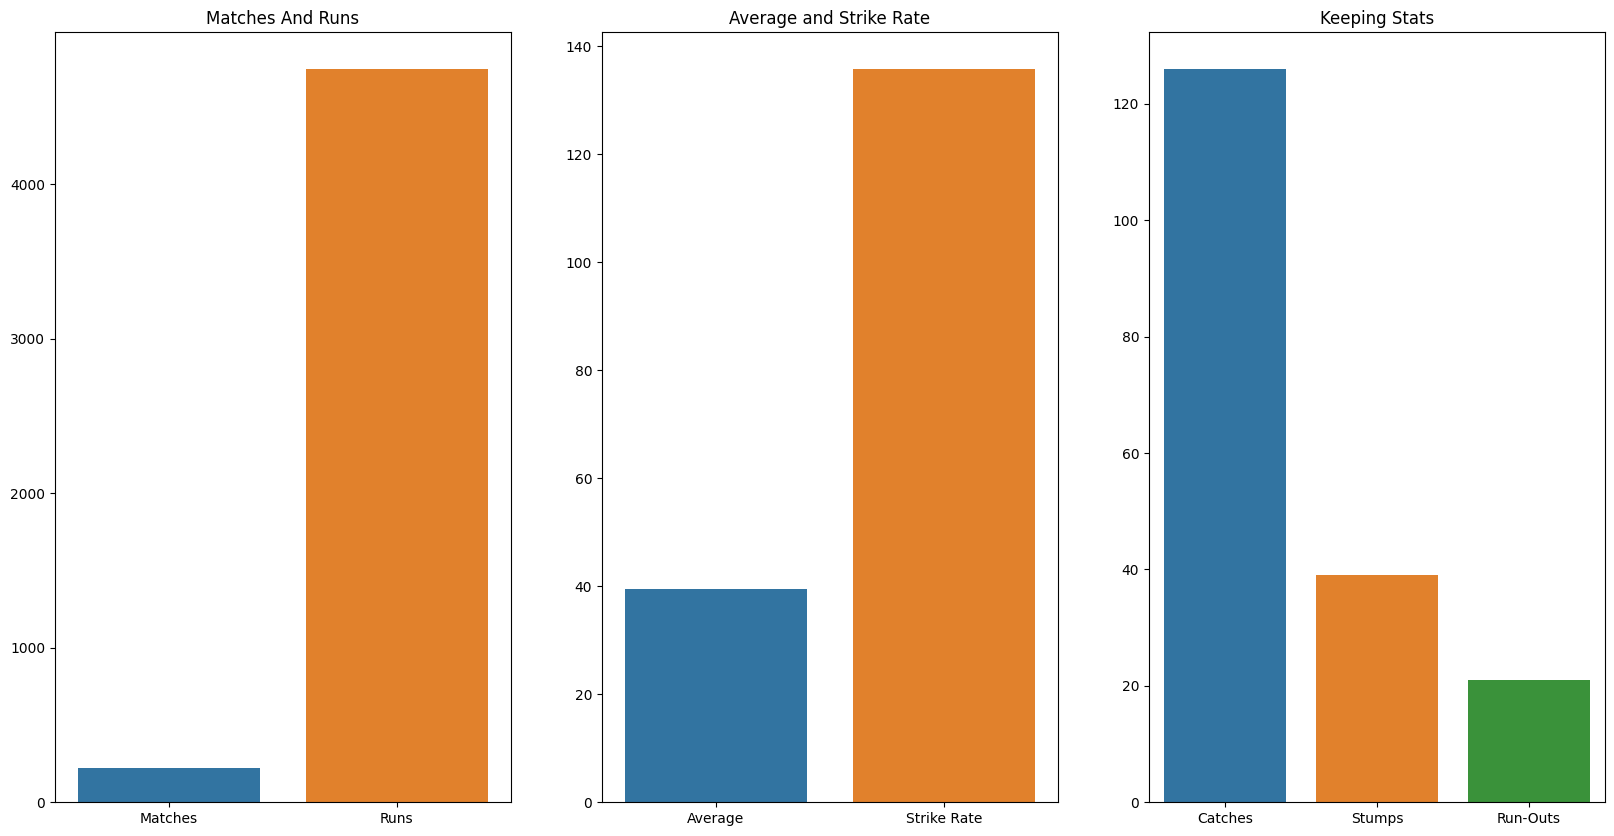

In [119]:
#Wicket Keeper For The Final 11 - MS Dhoni
matches_values = [top_keepers.iloc[8]['Matches_Played'], top_keepers.iloc[8]['Runs']] 
average_values = [top_keepers.iloc[8]['Average'], top_keepers.iloc[8]['Strike_Rate']]
keeping_values = [top_keepers.iloc[8]['Catches'], top_keepers.iloc[8]['Stumps'],top_keepers.iloc[8]['Run_outs']]

label1 = ['Matches', 'Runs']
label2 = ['Average', 'Strike Rate']
label3 =['Catches', 'Stumps', 'Run-Outs']

fig, axes = plt.subplots(1,3, figsize=(20,10)) 
axes[0].set_title("Matches And Runs") 
axes[1].set_title("Average and Strike Rate") 
axes[2].set_title("Keeping Stats")
sns.barplot(x=label1, y=matches_values, ax=axes[0]) 
sns.barplot(x=label2, y=average_values, ax=axes[1]) 
sns.barplot(x=label3, y=keeping_values, ax=axes[2])

<AxesSubplot: title={'center': 'Economy'}>

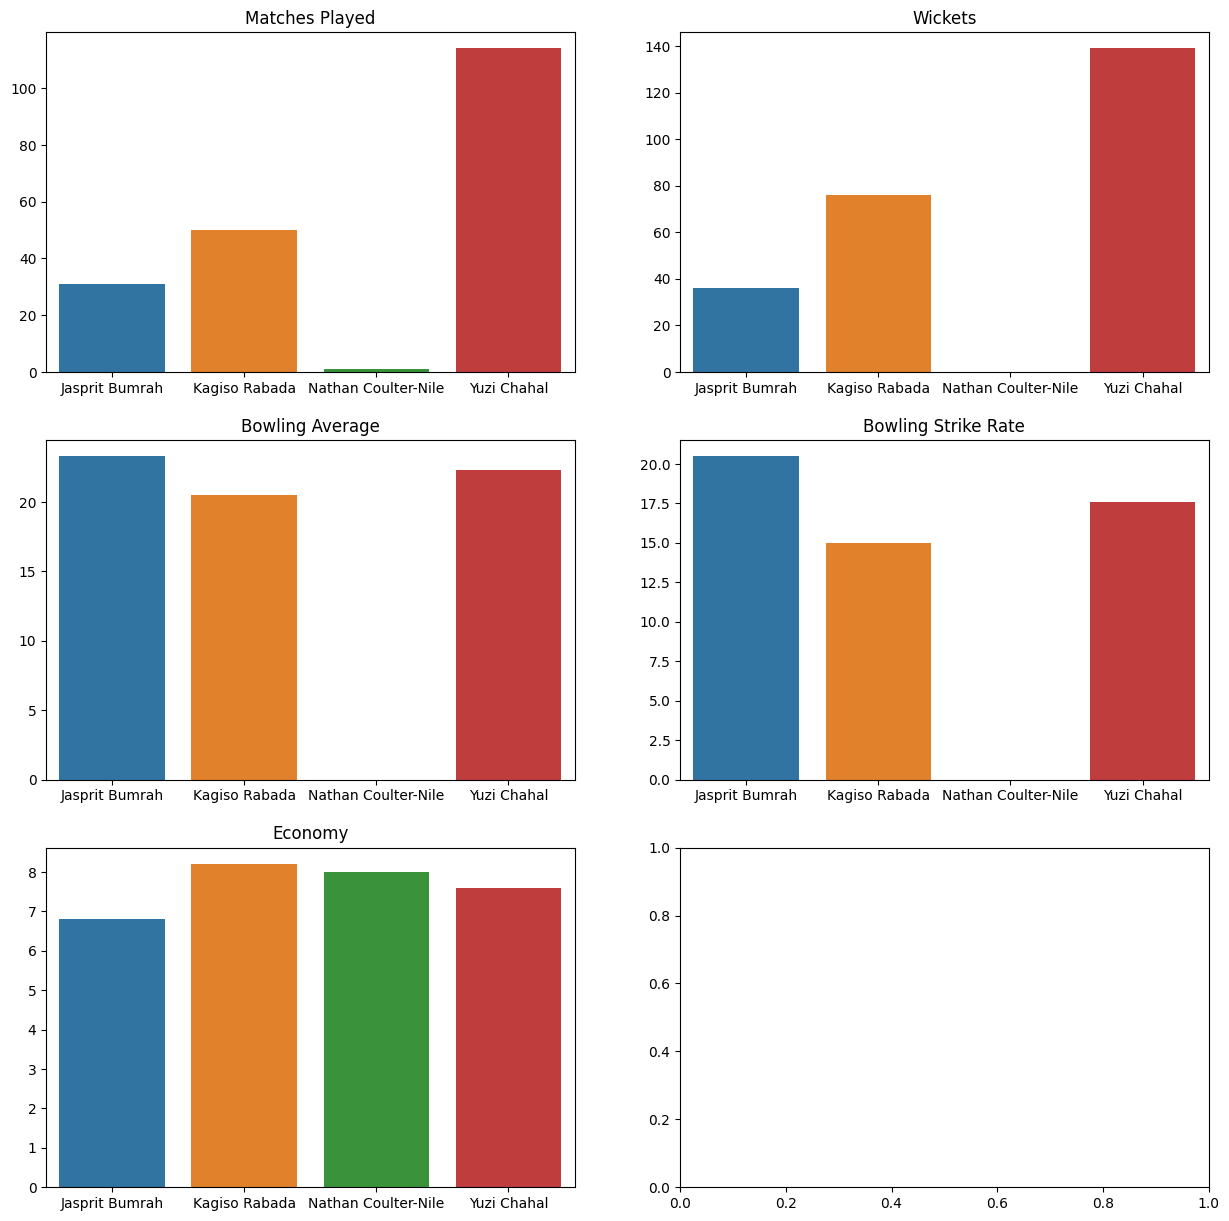

In [121]:
#Bowlers for the final 11-Jasprit Bumrah, Kagiso Rabada, Nathan Coulter-Nile, Yuzi Chahal
top_bowlers.reset_index(drop=True)
matches_values = [top_bowlers.iloc[10]['Matches_Played'], top_bowlers.iloc[0]['Matches_Played'], top_bowlers.iloc[7]['Matches_Played'], top_bowlers.iloc[1]['Matches_Played']] 
wickets_values = [top_bowlers.iloc[10]['Wickets'], top_bowlers.iloc[0]['Wickets'], top_bowlers.iloc[7]['Wickets'], top_bowlers.iloc[1]['Wickets']]
bowling_average_values = [top_bowlers.iloc[10]['Bowling_average'], top_bowlers.iloc[0]['Bowling_average'], top_bowlers.iloc[7]['Bowling_average'], top_bowlers.iloc[1]['Bowling_average']] 
bowling_strike_rate_values = [top_bowlers.iloc[10]['Bowling_Strike_Rate'], top_bowlers.iloc[0]['Bowling_Strike_Rate'], top_bowlers.iloc[7]['Bowling_Strike_Rate'], top_bowlers.iloc[1]['Bowling_Strike_Rate']]
economy_values = [top_bowlers.iloc[10]['Economy'], top_bowlers.iloc[0]['Economy'], top_bowlers.iloc[7]['Economy'], top_bowlers.iloc[1]['Economy']]
Labels = ['Jasprit Bumrah', 'Kagiso Rabada', 'Nathan Coulter-Nile', 'Yuzi Chahal']
fig, axes = plt.subplots(3,2, figsize=(15,15))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Economy")
sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[1][0]) 
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[1][1])
sns.barplot(x=Labels, y=economy_values, ax=axes[2][0])

In [123]:
batter1 = top_batters.loc[(top_batters["Player Name"] == 'KL Rahul ')]
batter2 = top_batters.loc[(top_batters["Player Name"] == 'David Warner ')] 
batter3 = top_batters. loc[(top_batters["Player Name"] == 'Virat Kohli')]

bowler1 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Yuzvendra Chahal ')] 
bowler2 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Jasprit Bumrah')] 
bowler3 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Nathan Coulter-Nile')] 
bowler4 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Kagiso Rabada ')]


allrounder1 =top_allrounders.loc[(top_allrounders["Player Name"] == 'Andre Russell')] 
allrounder2 =top_allrounders.loc[(top_allrounders["Player Name"] == 'Sunil Narine ')]
allrounder3 =top_allrounders.loc[(top_allrounders["Player Name"] == 'Hardik Pandya')]
keeper  = top_keepers.loc[(top_keepers["Player Name"] == 'MS Dhoni')]

In [128]:
final = [batter1, batter2, batter3, allrounder1, allrounder2, allrounder3, keeper, bowler1, bowler2, bowler3, bowler4]
final_team = pd.concat(final)
final_team=final_team.drop(labels=['Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets', 'Bowling_average', 'Economy', 'Bowling_Strike_Rate', 'Catches', 'Run_outs', 'Stumps'], axis=1)
final_team.reset_index(drop=True)

,Player Name,Team,Nationality
0,KL Rahul,Lucknow,Indian
1,David Warner,Delhi,Overseas
2,Virat Kohli,Bangalore,Indian
3,Andre Russell,Kolkata,Overseas
4,Sunil Narine,Kolkata,Overseas
5,Hardik Pandya,Gujarat,Indian
6,MS Dhoni,Chennai,Indian
7,Yuzvendra Chahal,Rajasthan,Indian
8,Jasprit Bumrah,Mumbai,Indian
9,Nathan Coulter-Nile,Rajasthan,Overseas
